In [6]:
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from IPython.display import display, HTML

#import my modules
import acquire as a
import prepare as p
import wrangle_zillow as w

from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Acquire

In [7]:
df = a.get_zillow()

In [8]:
df.head()

,parcelid,basementsqft,bathroomcnt,bedroomcnt,decktypeid,calculatedfinishedsquarefeet,fips,fireplacecnt,garagecarcnt,hashottuborspa,...,regionidcounty,regionidzip,typeconstructiondesc,unitcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxvaluedollarcnt,taxamount,logerror,transactiondate
0,14297519,NaN,3.5,4.0,NaN,3100.0,6059.0,NaN,2.0,NaN,...,1286.0,96978.0,NaN,NaN,485713.0,537569.0,1023282.0,11013.72,0.025595,2017-01-01
1,17052889,NaN,1.0,2.0,NaN,1465.0,6111.0,1.0,1.0,NaN,...,2061.0,97099.0,NaN,NaN,88000.0,376000.0,464000.0,5672.48,0.055619,2017-01-01
2,14186244,NaN,2.0,3.0,NaN,1243.0,6059.0,NaN,2.0,NaN,...,1286.0,97078.0,NaN,NaN,85289.0,479489.0,564778.0,6488.30,0.005383,2017-01-01
3,12177905,NaN,3.0,4.0,NaN,2376.0,6037.0,NaN,NaN,NaN,...,3101.0,96330.0,NaN,1.0,108918.0,36225.0,145143.0,1777.51,-0.103410,2017-01-01
4,10887214,NaN,3.0,3.0,NaN,1312.0,6037.0,NaN,NaN,NaN,...,3101.0,96451.0,NaN,1.0,73681.0,45726.0,119407.0,1533.89,0.006940,2017-01-01


In [9]:
df.shape

(77579, 36)

In [10]:
#getting the latest transactions 
df = df.sort_values(by ='transactiondate', ascending=True).drop_duplicates( subset = 'parcelid' ,keep= 'last')
  

In [11]:
df.shape

(77381, 36)

In [12]:
#this list has all types of single unit properties
single= ['Single Family Residential',' Mobile Home' , 'Townhouse ', 'Manufactured, Modular, Prefabricated Homes'  ]

In [13]:
#create a mask
single_mask = df['propertylandusedesc'].isin(single)

In [14]:
#if unitcnt == that's means is is a single property but if it is null we can compare with our list of single

In [15]:
#using that mask and also add  a condition
df_single = df[single_mask & ((df['unitcnt'] == 1) | (df['unitcnt'].isnull()))]
    

In [16]:
#this df contains all single unit homes of 2017 with the latest transaction
df_single.shape

(52350, 36)

In [17]:
a.summarize(df_single)

Dataframe shape: 
(52350, 36)
Dataframe head: 
   parcelid  basementsqft  bathroomcnt  bedroomcnt  decktypeid  \
0  14297519           NaN          3.5         4.0         NaN   
1  17052889           NaN          1.0         2.0         NaN   
2  14186244           NaN          2.0         3.0         NaN   

   calculatedfinishedsquarefeet    fips  fireplacecnt  garagecarcnt  \
0                        3100.0  6059.0           NaN           2.0   
1                        1465.0  6111.0           1.0           1.0   
2                        1243.0  6059.0           NaN           2.0   

   hashottuborspa  ...  regionidcounty  regionidzip  typeconstructiondesc  \
0             NaN  ...          1286.0      96978.0                   NaN   
1             NaN  ...          2061.0      97099.0                   NaN   
2             NaN  ...          1286.0      97078.0                   NaN   

   unitcnt  structuretaxvaluedollarcnt  landtaxvaluedollarcnt  \
0      NaN                   

Unique Values :  12
 
0.0       157
1.0       610
2.0      8343
3.0     23302
4.0     15202
5.0      3964
6.0       633
7.0       105
8.0        23
9.0         8
10.0        2
11.0        1
Name: bedroomcnt, dtype: int64
**decktypeid**
Unique Values :  1
 
66.0    390
Name: decktypeid, dtype: int64
**calculatedfinishedsquarefeet**
Unique Values :  4721
 
**fips**
Unique Values :  3
 
6037.0    33800
6059.0    14110
6111.0     4440
Name: fips, dtype: int64
**fireplacecnt**
Unique Values :  5
 
1.0    6022
2.0     941
3.0     229
4.0      35
5.0       3
Name: fireplacecnt, dtype: int64
**garagecarcnt**
Unique Values :  14
 
0.0        65
1.0      2196
2.0     14811
3.0       621
4.0       253
5.0        45
6.0        13
7.0         3
8.0         2
9.0         2
10.0        3
11.0        1
13.0        1
14.0        1
Name: garagecarcnt, dtype: int64
**hashottuborspa**
Unique Values :  1
 
1.0    1514
Name: hashottuborspa, dtype: int64
**latitude**
Unique Values :  50502
 
**longitude**
Un

**takeaways**
- numberofstories there is one property with 6 stories , I would drop it!
- unitcnt is not needed any more. I would drop it
- there are a lot of nulls so in preparation step I will handle them

# Preparation

In [18]:
p.miss_dup_values(df_single)

Your selected dataframe has 36 columns.
There are 25 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values
basementsqft,52303,99.9
storydesc,52303,99.9
storytypeid,52303,99.9
architecturalstyledesc,52280,99.9
architecturalstyletypeid,52280,99.9
typeconstructiontypeid,52274,99.9
typeconstructiondesc,52274,99.9
decktypeid,51960,99.3
hashottuborspa,50836,97.1
fireplacecnt,45120,86.2


In [19]:
df_single.shape

(52350, 36)

In [20]:
# I will drop columns and rows with a lot of null values 
#here I will include unitcnt because the value is 1 for all the properties . as it is the next to 65.6% 
#I can include it in my function
df_single= p.handle_missing_values(df_single, prop_required_columns=0.75, prop_required_row=0.75)

In [21]:
df_single.shape

(52348, 20)

In [22]:
p.miss_dup_values(df_single)

Your selected dataframe has 20 columns.
There are 9 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values
regionidcity,1034,2.0
lotsizesquarefeet,364,0.7
yearbuilt,118,0.2
structuretaxvaluedollarcnt,87,0.2
calculatedfinishedsquarefeet,86,0.2
regionidzip,25,0.0
taxamount,4,0.0
landtaxvaluedollarcnt,1,0.0
taxvaluedollarcnt,1,0.0


In [23]:

#all these  columns represent a minimun amount so I can drop them 
df_single= p.drop_low_missing_values(df_single, per= 3 )

In [24]:
df_single.shape

(50819, 20)

In [25]:
p.miss_dup_values(df_single)

Your selected dataframe has 20 columns.
There are 0 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values


In [26]:
a.summarize(df_single)

Dataframe shape: 
(50819, 20)
Dataframe head: 
   parcelid  bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet    fips  \
0  14297519          3.5         4.0                        3100.0  6059.0   
1  17052889          1.0         2.0                        1465.0  6111.0   
2  14186244          2.0         3.0                        1243.0  6059.0   

     latitude    longitude  lotsizesquarefeet  yearbuilt  \
0  33634931.0 -117869207.0             4506.0     1998.0   
1  34449266.0 -119281531.0            12647.0     1967.0   
2  33886168.0 -117823170.0             8432.0     1962.0   

   propertylandusetypeid        propertylandusedesc  regionidcity  \
0                  261.0  Single Family Residential       53571.0   
1                  261.0  Single Family Residential       13091.0   
2                  261.0  Single Family Residential       21412.0   

   regionidcounty  regionidzip  structuretaxvaluedollarcnt  \
0          1286.0      96978.0                    485713.0  

Unique Values :  14037
 
**yearbuilt**
Unique Values :  133
 
(1877.861, 1891.8]       21
(1891.8, 1905.6]        165
(1905.6, 1919.4]       1001
(1919.4, 1933.2]       3979
(1933.2, 1947.0]       4787
(1947.0, 1960.8]      15667
(1960.8, 1974.6]      10098
(1974.6, 1988.4]       6814
(1988.4, 2002.2]       5595
(2002.2, 2016.0]       2692
Name: yearbuilt, dtype: int64
**propertylandusetypeid**
Unique Values :  2
 
261.0    50778
275.0       41
Name: propertylandusetypeid, dtype: int64
**propertylandusedesc**
Unique Values :  2
 
Single Family Residential                     50778
Manufactured, Modular, Prefabricated Homes       41
Name: propertylandusedesc, dtype: int64
**regionidcity**
Unique Values :  175
 
(3097.9339999999997, 7421.65]     2589
(7421.65, 11352.3]                1628
(11352.3, 15282.95]              15449
(15282.95, 19213.6]               2899
(19213.6, 23144.25]               1236
                                 ...  
(376902.75, 380833.4]                0
(380833

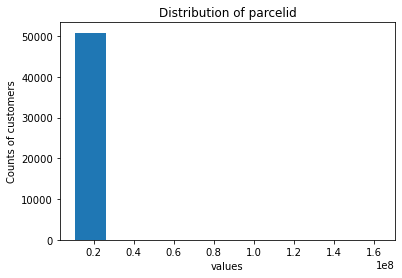

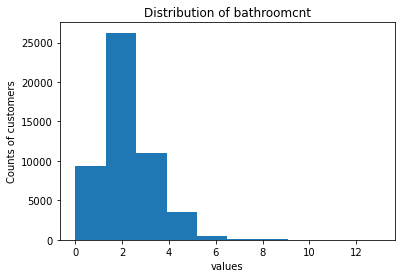

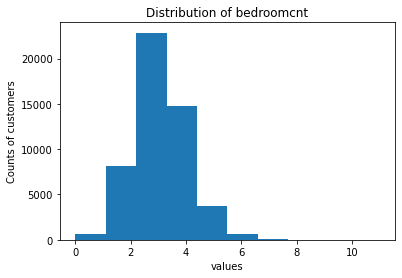

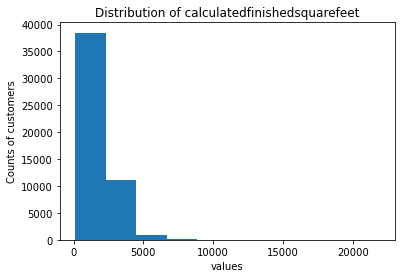

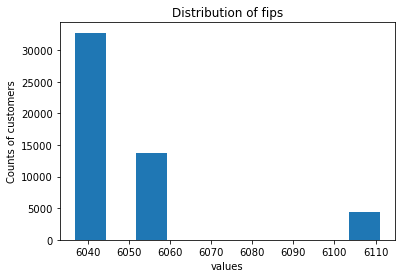

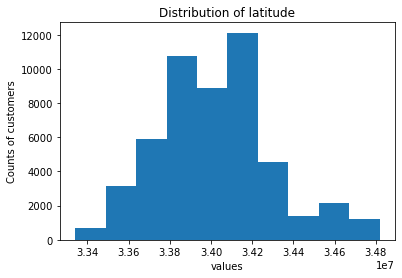

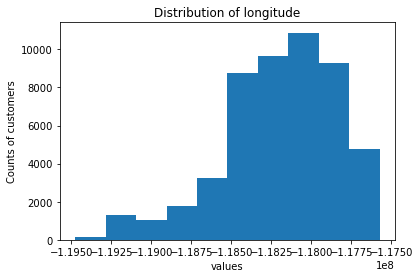

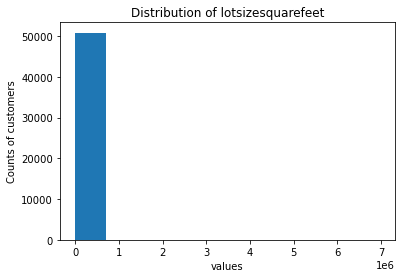

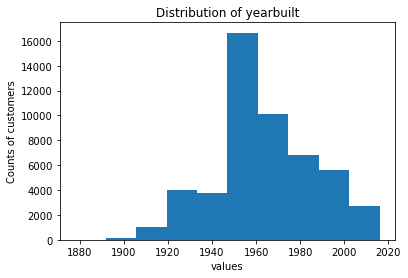

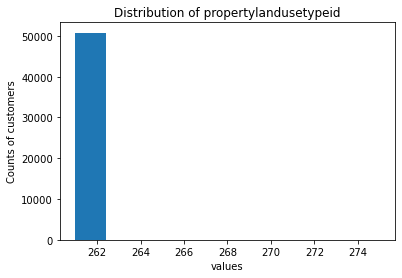

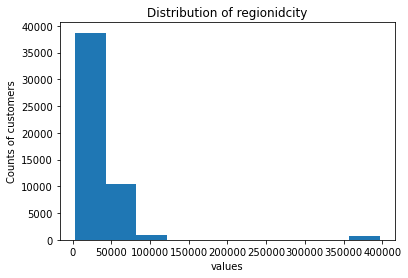

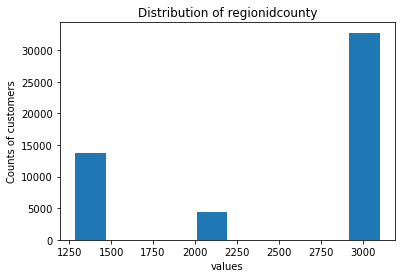

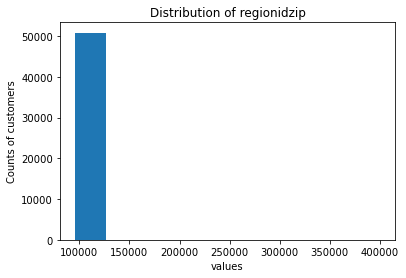

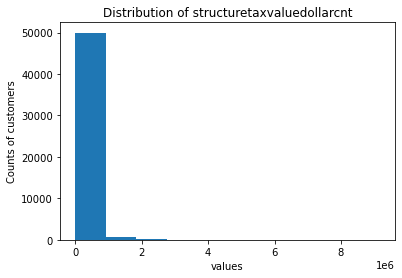

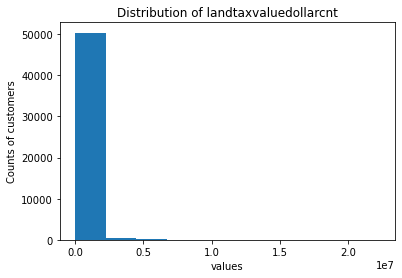

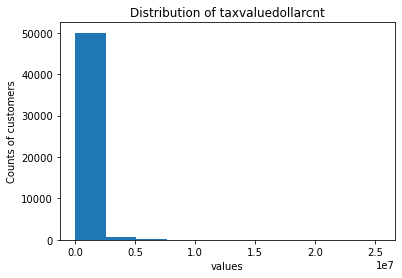

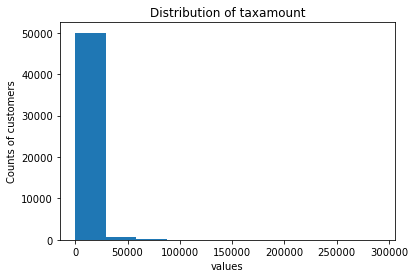

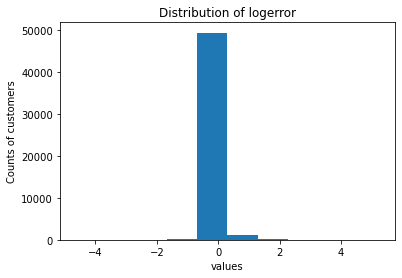

In [27]:
p.distribution(df_single)

### get county names and create dummy variables with those

In [28]:
# create dummy vars of fips id
county_df = pd.get_dummies(df_single.fips)

In [29]:
county_df.head()

,6037.0,6059.0,6111.0
0,0,1,0
1,0,0,1
2,0,1,0
3,1,0,0
6,1,0,0


- county # 6037 -----> Los Angeles
- county # 6059 -----> Orange
- county # 6111 -----> Ventura

In [33]:
#df_single = p.get_counties(df_single)

In [34]:
# print("LA County Verified: ", df_single[df_single.fips==6037]['fips'].count() == df_single.los_angeles.sum())
# print("Orange County Verified: ", df_single[df_single.fips==6059]['fips'].count() == df_single.orange.sum())
# print("Ventura County Verified: ", df_single[df_single.fips==6111]['fips'].count() == df_single.ventura.sum())

In [35]:
#now in my function I can drop fips

###  Compute new features out of existing features in order to reduce noise, capture signals, and reduce collinearity, or dependence between independent variables.

**- age**

In [36]:
df_single['age'] = 2017 - df.yearbuilt

In [37]:
df_single.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,yearbuilt,propertylandusetypeid,...,regionidcounty,regionidzip,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxvaluedollarcnt,taxamount,logerror,transactiondate,county_name,age
0,14297519,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,1998.0,261.0,...,1286.0,96978.0,485713.0,537569.0,1023282.0,11013.72,0.025595,2017-01-01,Orange,19.0
1,17052889,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,1967.0,261.0,...,2061.0,97099.0,88000.0,376000.0,464000.0,5672.48,0.055619,2017-01-01,Ventura,50.0
2,14186244,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,1962.0,261.0,...,1286.0,97078.0,85289.0,479489.0,564778.0,6488.30,0.005383,2017-01-01,Orange,55.0
3,12177905,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,1970.0,261.0,...,3101.0,96330.0,108918.0,36225.0,145143.0,1777.51,-0.103410,2017-01-01,Los Angeles,47.0
6,12095076,3.0,4.0,2962.0,6037.0,34145202.0,-118179824.0,63000.0,1950.0,261.0,...,3101.0,96293.0,276684.0,496619.0,773303.0,9516.26,-0.001011,2017-01-01,Los Angeles,67.0


In [38]:
df_single[['age']].describe()

,age
count,50819.000000
mean,53.981523
std,22.812845
min,1.000000
25%,39.000000
50%,57.000000
75%,67.000000
max,139.000000


In [39]:
# I can drop yearbuilt

**- taxrate**


In [40]:
df_single['taxrate'] = df_single.taxamount/df_single.taxvaluedollarcnt*100

In [41]:
df_single[['taxrate']].describe()

,taxrate
count,50819.000000
mean,1.332409
std,0.563718
min,0.009372
25%,1.163323
50%,1.231985
75%,1.365681
max,49.364739


In [42]:
# I will drop taxamount and taxvaluedollarcnt

**- transactiondate**


In [43]:
df_single[['transactiondate']].head()

,transactiondate
0,2017-01-01
1,2017-01-01
2,2017-01-01
3,2017-01-01
6,2017-01-01


In [44]:
#I decided to convert transaction date to int so in the future can make groups

In [45]:
df_single['transactiondate']=(df_single['transactiondate'].str.replace(' ','').str.replace('-',''))

In [46]:
df_single['transactiondate'] = df_single['transactiondate'].astype('int')

In [49]:
#df_single[(df_single.transactiondate >= 20170101) &  (df_single.transactiondate < 20170501)]

In [52]:
#try to bin transaction date
df_single['quadrimester'] = pd.cut(df_single.transactiondate, bins = [ 20170100, 20170500, 20170900, 20171230])

In [53]:
df_single['quadrimester'].value_counts()

(20170500, 20170900]    27284
(20170100, 20170500]    20418
(20170900, 20171230]     3117
Name: quadrimester, dtype: int64

In [54]:
#this is just to check if bins are correct
#this is the fist quadrimester
(df_single['transactiondate']<20170501).sum()

20418

In [55]:
#this is the second quadrimester
((df_single['transactiondate']>= 20170501)  & (df_single['transactiondate']<20170901)).sum()

27284

In [57]:
#this is the third quadrimester
((df_single['transactiondate']>= 20170901)  & (df_single['transactiondate']<20171232)).sum()

3117

In [58]:
#try to bin transaction date
df_single['quadrimester'] = pd.cut(df_single.transactiondate, bins = [ 20170100, 20170500, 20170900, 20171230],
                                 labels = [1,2,3])

In [59]:
df_single['quadrimester'].value_counts()

2    27284
1    20418
3     3117
Name: quadrimester, dtype: int64

In [60]:
df_single[['transactiondate', 'quadrimester']].sample(30)

,transactiondate,quadrimester
25069,20170410,1
31931,20170501,2
67502,20170817,2
36875,20170517,2
7204,20170201,1
32124,20170502,2
3789,20170118,1
13089,20170228,1
68288,20170818,2
43652,20170606,2


In [48]:
df_single.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50819 entries, 0 to 77578
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      50819 non-null  int64  
 1   bathroomcnt                   50819 non-null  float64
 2   bedroomcnt                    50819 non-null  float64
 3   calculatedfinishedsquarefeet  50819 non-null  float64
 4   fips                          50819 non-null  float64
 5   latitude                      50819 non-null  float64
 6   longitude                     50819 non-null  float64
 7   lotsizesquarefeet             50819 non-null  float64
 8   yearbuilt                     50819 non-null  float64
 9   propertylandusetypeid         50819 non-null  float64
 10  propertylandusedesc           50819 non-null  object 
 11  regionidcity                  50819 non-null  float64
 12  regionidcounty                50819 non-null  float64
 13  r

In [ ]:
df_single['lotsize_acres'] = df_single.lotsizesquarefeet/43560
df_single = df_single.drop(columns = ['yearbuilt', 'taxamount', 'taxvaluedollarcnt', 'lotsizesquarefeet'  ])

In [ ]:
def create_features (df) :
    '''
    takes in a df and create age , taxrate, lotsize_acres columns and convert transactiondate to int
    drops 'yearbuilt', 'taxamount', 'taxvaluedollarcnt', lotsizesquarefeet columns
    '''
    #create a new colum with age
    df['age'] = 2017 - df.yearbuilt
    
    #taxrate
    df['taxrate'] = df.taxamount/df.taxvaluedollarcnt*100
    
  #transactiondate
    df['transactiondate']=(df['transactiondate'].str.replace(' ','').str.replace('-',''))
    df['transactiondate'] = df['transactiondate'].astype('int')
    #try to bin transaction date
    df['quadrimester'] = pd.cut(df.transactiondate, bins = [ 20170100, 20170500, 20170900, 20171230],
                                 labels = [1,2,3])
     # create acres variable
    df['lotsize_acres'] = df.lotsizesquarefeet/43560
    
    #drop columns
    df = df.drop(columns = ['yearbuilt', 'taxamount', 'taxvaluedollarcnt', 'lotsizesquarefeet'  ])
    
    return df

In [ ]:
p.distribution_boxplot(df_single)

In [ ]:
df_single.columns

In [ ]:
# I will handle outliers for : 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'regionidzip', 
#'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxrate', 'lotsize_acres', 'age'

In [ ]:
col = ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'regionidzip', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxrate', 'lotsize_acres', 'age']

In [ ]:
df_final= p.remove_outliers(df_single, col)

In [ ]:
p.distribution_boxplot(df_final)

In [ ]:
df_final.shape, df_single.shape

In [ ]:
df_final['regionidcity'].value_counts()

In [ ]:
df_final.info()

In [ ]:
# here I can drop
# propertylandusedesc 

In [2]:
#checking wrangle_zillow function
train, validate, test= w.wrangle_zillow()

before outliers (50819, 21)
df shape --> (34126, 20)
train -> (19110, 20)
validate -> (8190, 20)
test -> (6826, 20)


In [3]:
((50819-34126)*100) / 50819

32.847950569668825

In [4]:
X_train, y_train, X_validate, y_validate, X_test, y_test = p.split_Xy(train, validate, test, 'logerror') 

X_train -> (19110, 19)               y_train->(19110,)
X_validate -> (8190, 19)         y_validate->(8190,) 
X_test -> (6826, 19)                  y_test>(6826,)


In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19110 entries, 54155 to 12794
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   parcelid                      19110 non-null  object  
 1   bathroomcnt                   19110 non-null  float64 
 2   bedroomcnt                    19110 non-null  float64 
 3   calculatedfinishedsquarefeet  19110 non-null  float64 
 4   fips                          19110 non-null  float64 
 5   latitude                      19110 non-null  float64 
 6   longitude                     19110 non-null  float64 
 7   propertylandusetypeid         19110 non-null  float64 
 8   regionidcity                  19110 non-null  float64 
 9   regionidcounty                19110 non-null  float64 
 10  regionidzip                   19110 non-null  float64 
 11  structuretaxvaluedollarcnt    19110 non-null  float64 
 12  landtaxvaluedollarcnt         19110 non-nu

In [ ]:
train.head()

In [ ]:
scal_var = ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet','latitude', 'longitude', 
            'structuretaxvaluedollarcnt', 'age', 'taxrate', 'lotsize_acres']

In [ ]:
train_scaled_df, validate_scaled_df, test_scaled_df = p.scaled_df( train , validate, test, scal_var, MinMaxScaler())

In [ ]:
train_scaled_df

In [ ]:
train

# Explore 

In [ ]:
explore target

In [ ]:
plt.figure(figsize=(13, 8))
train['logerror'].hist(grid=False, color = 'teal')
plt.xlabel("logerror")
plt.ylabel("Number of properties")                               
plt.xlim(-2 ,3)
plt.show()

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(train['logerror'])
plt.xlim(-.25 ,.25)
plt.show()

In [ ]:
train['logerror'].describe()

In [ ]:
p.

In [ ]:
train['logerror_bins']= pd.cut(train.logerror, [-5, -.2, -.05, .05, .2, 4])

In [ ]:
train.logerror_bins.value_counts()

In [ ]:
train.columns

In [ ]:
sns.pairplot(data = train, hue = 'logerror_bins',
             x_vars = ['logerror', 'structuretaxvaluedollarcnt', 'quadrimester', 'taxrate', 
                       'bedroomcnt'],
             y_vars = ['logerror', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'lotsize_acres', 'age'])

takeaways 
- the log error is low for the houses less than 20 years old  that were sold in the 2nd and 3rd quadrimester
- the range of log error is higher for the houses  that are 50 -70 years old
- the range of logerror is low for the lower and higher lot sizes
- the range of logerror is low for the lower and higher calculatedfinishedsqrefeet
- the logerror is low for the calculatedfihishedsquarefeet >1500 and with 4 bedrooms
- the logerror is low for 2.5 -3 bathrooms and were sold jan -dic
- the log error for a 5bedrooms is low with 1 -4 bathrooms except 2 bathrooms
- the range of log error in 3.5 baths is low

In [ ]:
print('Relationship between Age  and logerror)')
sns.jointplot(x='age', y='lotsize_acres', data=train, hue='logerror_bins')
plt.xlabel('Age')
plt.ylabel('lot size')
plt.legend()
plt.show()

In [ ]:
train.head()

In [ ]:
print('Relationship between Age  and logerror)')
sns.jointplot(x='los_angeles', y='logerror', data=train)
plt.xlabel('Age')
plt.ylabel('lot size')
plt.legend('center')
plt.show()

In [ ]:
sns.boxplot(train.age_bin, train.spending_score)
plt.title('Spending Score across age bins')
plt.show()

In [ ]:
def create_cluster(df, X, k):
    
    """ Takes in df, X (dataframe with variables you want to cluster on) and k
    # It scales the X, calcuates the clusters and return train (with clusters), the Scaled dataframe,
    #the scaler and kmeans object and unscaled centroids as a dataframe"""
    
    scaler = StandardScaler(copy=True).fit(X)
    X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns.values).set_index([X.index.values])
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    kmeans.predict(X_scaled)
    df['cluster'] = kmeans.predict(X_scaled)
    df['cluster'] = 'cluster_' + df.cluster.astype(str)
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    return df, X_scaled, scaler, kmeans, centroids

In [ ]:
def create_scatter_plot(x,y,df,kmeans, X_scaled, scaler):
    
    """ Takes in x and y (variable names as strings, along with returned objects from previous
    function create_cluster and creates a plot"""
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x = x, y = y, data = df, hue = 'cluster')
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.30, s=500, c='black')